In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

!pip install -q tf-nightly-2.0-preview
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

     |████████████████████████████████| 87.6MB 3.0MB/s 
     |████████████████████████████████| 3.1MB 42.5MB/s 
     |████████████████████████████████| 430kB 48.1MB/s 
     |████████████████████████████████| 61kB 25.2MB/s 
ERROR: thinc 6.12.1 has requirement wrapt<1.11.0,>=1.10.0, but you'll have wrapt 1.11.1 which is incompatible.
2.0.0-dev20190516


In [2]:
# multi-hot encode. convert [3, 5] into a 10,000-D vector that
# would be all-zeros except for indices 3 and 5, which would be ones.

# This model will quickly overfit to the training set.
# It will be used to demonstrate when overfitting occurs, and how to fight it

NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = \
        keras.datasets.imdb.load_data(num_words=NUM_WORDS)

17465344/17464789 [==============================] - 0s 0us/step


In [0]:
def multi_hot_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    
    for i, word_indicies in enumerate(sequences):
        results[i, word_indicies] = 1.0
    
    return results

In [0]:
train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

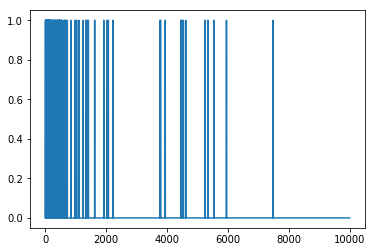

In [5]:
# word indices are sorted by frequency.
# so it is expected that there are more 1 values near index zero
plt.plot(train_data[0])

In [9]:
## Demonstrate overfitting
# The simplest way to prevent overfitting is to reduce the size of model.
# i.e. the number of learnable parameters(model's capacity) in the model 
# (which is determined by the number of layers and the number of units per layer)

# Create a simple model using only Dense layers as a baseline, then create smaller and larger versions, and compare them.

baseline_model = keras.Sequential([
    # `input_shape` is only required here so that `.summary` works.
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [11]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 4s - loss: 0.4374 - accuracy: 0.8244 - binary_crossentropy: 0.4374 - val_loss: 0.3053 - val_accuracy: 0.8826 - val_binary_crossentropy: 0.3053
Epoch 2/20
25000/25000 - 4s - loss: 0.2246 - accuracy: 0.9206 - binary_crossentropy: 0.2246 - val_loss: 0.2844 - val_accuracy: 0.8864 - val_binary_crossentropy: 0.2844
Epoch 3/20
25000/25000 - 4s - loss: 0.1675 - accuracy: 0.9433 - binary_crossentropy: 0.1675 - val_loss: 0.3006 - val_accuracy: 0.8805 - val_binary_crossentropy: 0.3006
Epoch 4/20
25000/25000 - 3s - loss: 0.1359 - accuracy: 0.9551 - binary_crossentropy: 0.1359 - val_loss: 0.3451 - val_accuracy: 0.8694 - val_binary_crossentropy: 0.3451
Epoch 5/20
25000/25000 - 3s - loss: 0.1113 - accuracy: 0.9640 - binary_crossentropy: 0.1113 - val_loss: 0.3523 - val_accuracy: 0.8712 - val_binary_crossentropy: 0.3523
Epoch 6/20
25000/25000 - 3s - loss: 0.0903 - accuracy: 0.9733 - binary_crossentropy: 0.0903 - val_loss: 0.3808

In [12]:
# Create a smaller model with less hidden units
# to compare against the baseline model that we just created
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

smaller_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [13]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 4s - loss: 0.6235 - accuracy: 0.6627 - binary_crossentropy: 0.6235 - val_loss: 0.5679 - val_accuracy: 0.7297 - val_binary_crossentropy: 0.5679
Epoch 2/20
25000/25000 - 3s - loss: 0.5180 - accuracy: 0.8154 - binary_crossentropy: 0.5180 - val_loss: 0.5092 - val_accuracy: 0.8007 - val_binary_crossentropy: 0.5092
Epoch 3/20
25000/25000 - 3s - loss: 0.4607 - accuracy: 0.8733 - binary_crossentropy: 0.4607 - val_loss: 0.4761 - val_accuracy: 0.8333 - val_binary_crossentropy: 0.4761
Epoch 4/20
25000/25000 - 3s - loss: 0.4208 - accuracy: 0.9040 - binary_crossentropy: 0.4208 - val_loss: 0.4541 - val_accuracy: 0.8564 - val_binary_crossentropy: 0.4541
Epoch 5/20
25000/25000 - 3s - loss: 0.3902 - accuracy: 0.9236 - binary_crossentropy: 0.3902 - val_loss: 0.4457 - val_accuracy: 0.8569 - val_binary_crossentropy: 0.4457
Epoch 6/20
25000/25000 - 3s - loss: 0.3651 - accuracy: 0.9366 - binary_crossentropy: 0.3651 - val_loss: 0.4286

In [14]:
# even larger model, and see how quickly it begins overfitting. 
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [15]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 15s - loss: 0.3483 - accuracy: 0.8510 - binary_crossentropy: 0.3483 - val_loss: 0.2999 - val_accuracy: 0.8779 - val_binary_crossentropy: 0.2999
Epoch 2/20
25000/25000 - 15s - loss: 0.1486 - accuracy: 0.9462 - binary_crossentropy: 0.1486 - val_loss: 0.3358 - val_accuracy: 0.8726 - val_binary_crossentropy: 0.3358
Epoch 3/20
25000/25000 - 15s - loss: 0.0528 - accuracy: 0.9846 - binary_crossentropy: 0.0528 - val_loss: 0.4422 - val_accuracy: 0.8690 - val_binary_crossentropy: 0.4422
Epoch 4/20
25000/25000 - 16s - loss: 0.0082 - accuracy: 0.9986 - binary_crossentropy: 0.0082 - val_loss: 0.5803 - val_accuracy: 0.8690 - val_binary_crossentropy: 0.5803
Epoch 5/20
25000/25000 - 15s - loss: 0.0014 - accuracy: 0.9999 - binary_crossentropy: 0.0014 - val_loss: 0.6749 - val_accuracy: 0.8703 - val_binary_crossentropy: 0.6749
Epoch 6/20
25000/25000 - 15s - loss: 6.7095e-04 - accuracy: 0.9999 - binary_crossentropy: 6.7095e-04 - va

In [0]:
## Plot the training and validation loss
# Here, the smaller network begins overfitting later than the baseline model

def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(16, 10))
    
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                      '--',
                      label=name+' Val')
        
        plt.plot(history.epoch,
                 history.history[key],
                 color=val[0].get_color(),
                 label=name.title()+' Train')
        
        plt.xlabel('Epochs')
        plt.ylabel(key.replace('_', ' '))
        plt.legend()

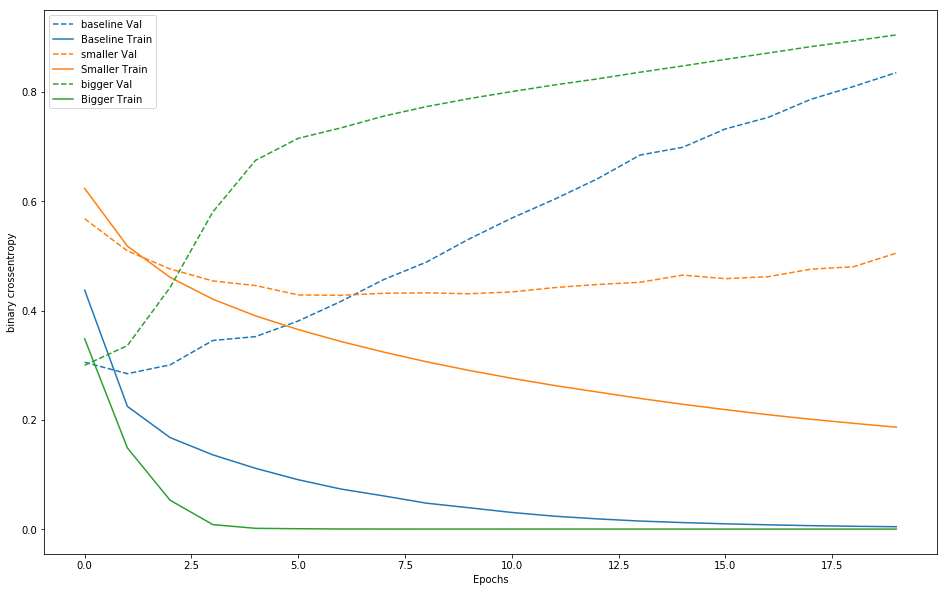

In [28]:
plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

In [30]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data,
                                train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 4s - loss: 0.5365 - accuracy: 0.7888 - binary_crossentropy: 0.4968 - val_loss: 0.3811 - val_accuracy: 0.8772 - val_binary_crossentropy: 0.3404
Epoch 2/20
25000/25000 - 4s - loss: 0.3019 - accuracy: 0.9087 - binary_crossentropy: 0.2569 - val_loss: 0.3336 - val_accuracy: 0.8872 - val_binary_crossentropy: 0.2854
Epoch 3/20
25000/25000 - 4s - loss: 0.2468 - accuracy: 0.9313 - binary_crossentropy: 0.1959 - val_loss: 0.3376 - val_accuracy: 0.8855 - val_binary_crossentropy: 0.2849
Epoch 4/20
25000/25000 - 4s - loss: 0.2241 - accuracy: 0.9415 - binary_crossentropy: 0.1695 - val_loss: 0.3571 - val_accuracy: 0.8791 - val_binary_crossentropy: 0.3010
Epoch 5/20
25000/25000 - 4s - loss: 0.2073 - accuracy: 0.9497 - binary_crossentropy: 0.1502 - val_loss: 0.3688 - val_accuracy: 0.8777 - val_binary_crossentropy: 0.3107
Epoch 6/20
25000/25000 - 4s - loss: 0.1950 - accuracy: 0.9558 - binary_crossentropy: 0.1358 - val_loss: 0.3827

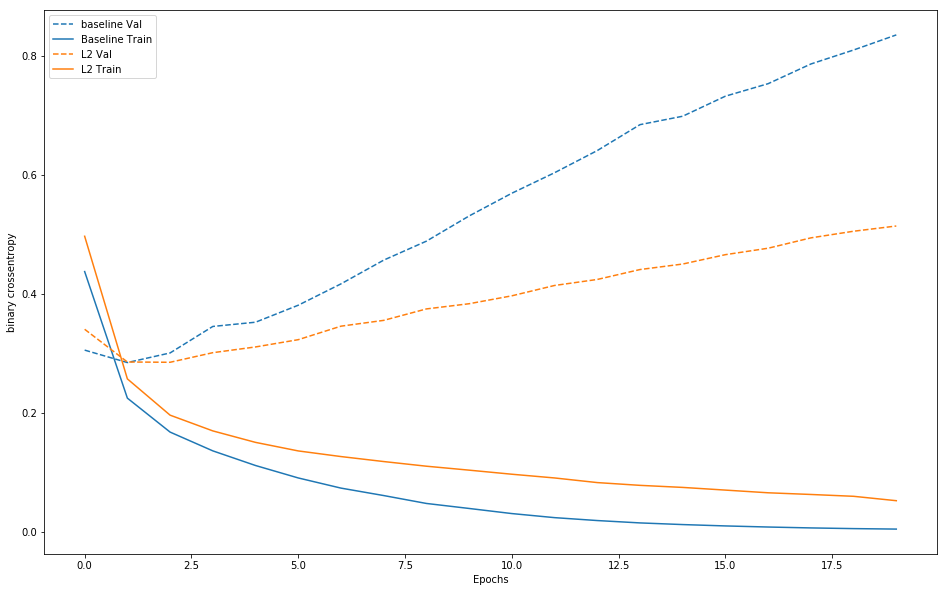

In [33]:
plot_history([('baseline', baseline_history),
              ('L2', l2_model_history)])
# L2 regularized model has become much more resistant to overfitting than the baseline model, even though both models have the same number of parameters.

In [35]:
## Add dropout
# after applying dropout, this vector will have a few zero entries distributed at random
#  layer's output values are scaled down by a factor equal to the dropout rate, 
# so as to balance for the fact that more units are active than at training time.
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy', 'binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data,
                                  train_labels,
                                  epochs=30,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/30
25000/25000 - 4s - loss: 0.6304 - accuracy: 0.6367 - binary_crossentropy: 0.6304 - val_loss: 0.4913 - val_accuracy: 0.8528 - val_binary_crossentropy: 0.4913
Epoch 2/30
25000/25000 - 4s - loss: 0.4621 - accuracy: 0.8000 - binary_crossentropy: 0.4621 - val_loss: 0.3470 - val_accuracy: 0.8823 - val_binary_crossentropy: 0.3470
Epoch 3/30
25000/25000 - 4s - loss: 0.3613 - accuracy: 0.8590 - binary_crossentropy: 0.3613 - val_loss: 0.2927 - val_accuracy: 0.8854 - val_binary_crossentropy: 0.2927
Epoch 4/30
25000/25000 - 4s - loss: 0.2975 - accuracy: 0.8947 - binary_crossentropy: 0.2975 - val_loss: 0.2751 - val_accuracy: 0.8884 - val_binary_crossentropy: 0.2751
Epoch 5/30
25000/25000 - 4s - loss: 0.2479 - accuracy: 0.9125 - binary_crossentropy: 0.2479 - val_loss: 0.2784 - val_accuracy: 0.8891 - val_binary_crossentropy: 0.2784
Epoch 6/30
25000/25000 - 4s - loss: 0.2156 - accuracy: 0.9266 - binary_crossentropy: 0.2156 - val_loss: 0.2886

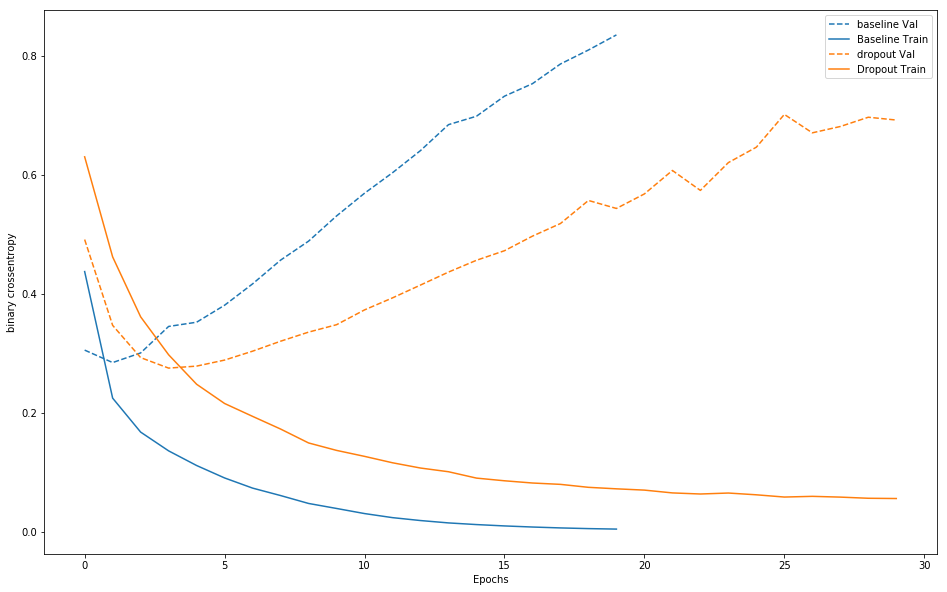

In [36]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])

In [0]:
# To recap: here are the most common ways to prevent overfitting in neural networks:

# Get more training data.
# Reduce the capacity of the network.
# Add weight regularization.
# Add dropout.